[dataset link](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)

## Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.





## Import Data and Required Packages

In [1]:
import warnings
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#### Import the CSV Data as Pandas DataFrame

In [5]:
application_record_path = os.path.normpath("dataset/application_record.csv")
credit_record_path = os.path.normpath("dataset/credit_record.csv")

df1 = pd.read_csv(application_record_path)
df2 = pd.read_csv(credit_record_path)


In [6]:
df1.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
df2.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
df1.shape, df2.shape


((438557, 18), (1048575, 3))

In [9]:
df = df1.merge(df2, how='inner', on=['ID'])


## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [10]:
df.isna().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [11]:
df['OCCUPATION_TYPE'].replace(np.nan, 'others', inplace=True)


### 3.2 Check Duplicates

In [12]:
df.duplicated().sum()


0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [13]:
# Check Null and Dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()


ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           19
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64

### 3.5 Check statistics of data set

In [15]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,777715.0,5.078743e+06,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
CNT_CHILDREN,777715.0,4.280823e-01,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,1.885348e+05,101622.450077,27000.0,121500.0,162000.0,225000.0,1575000.0
DAYS_BIRTH,777715.0,-1.612494e+04,4104.304018,-25152.0,-19453.0,-15760.0,-12716.0,-7489.0
DAYS_EMPLOYED,777715.0,5.777583e+04,136471.735391,-15713.0,-3292.0,-1682.0,-431.0,365243.0
FLAG_MOBIL,777715.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,777715.0,2.318176e-01,0.421993,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,777715.0,3.009650e-01,0.458678,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,777715.0,9.167497e-02,0.288567,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,777715.0,2.208837e+00,0.907380,1.0,2.0,2.0,3.0,20.0


### 3.6 Derive features for `DAYS_BIRTH` and `DAYS_EMPLOYED`

In [16]:
# get age of each person
df['AGE'] = -(df['DAYS_BIRTH'])//365

# get employed year of each person
df['YEAR_EMPLOYED'] = -(df['DAYS_EMPLOYED'])//365
df['YEAR_EMPLOYED'].replace(-1001, -1, inplace=True)

# replace the value of C and X to numeric
df['STATUS'].replace({'C': 6, 'X': 7}, inplace=True)
df['STATUS'] = df['STATUS'].astype(int)


### 3.7 Data Labeling for `Status` column

    0: 1-29 days past due 
    1: 30-59 days past due 
    2: 60-89 days overdue 
    3: 90-119 days overdue 
    4: 120-149 days overdue 
    5: Overdue or bad debts, write-offs for more than 150 days 
    6: paid off that month 
    7: No loan for the month

In [17]:
def get_label_for_data(x):
    target = ''
    if x in (2, 3, 4, 5):
        target = 1  # risky
    else:
        target = 0  # not risky

    return target


sorted(df['STATUS'].unique())


[0, 1, 2, 3, 4, 5, 6, 7]

In [18]:
df['LABEL'] = df['STATUS'].apply(get_label_for_data)
df['LABEL'] = df['LABEL'].astype('category')


In [19]:
# drop unnessesary columns
df = df.drop(['ID', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'STATUS', 'FLAG_MOBIL'], axis=1)


### 3.8 Assign correct data types

In [20]:
cat_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'LABEL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL']

In [21]:
df[cat_columns] = df[cat_columns].astype('category')

## 4. Exploring Data ( Visualization )

### 4.1 Categorical Data

In [22]:
df.select_dtypes(include='category').head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,LABEL
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,0
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,0
2,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,0
3,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,0
4,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,0


In [23]:
df.select_dtypes(include='category').head().columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'LABEL'],
      dtype='object')

In [24]:
# Function to plat bar graph w.r.t given column
def category_bar_plot(df, columns):
    rows = int(len(columns)/2)+1
    for index, value in enumerate(columns, start=1):
        plt.subplot(rows, 3, index)
        ax = sns.countplot(x=value, data=df, palette='flare', order = df[value].value_counts().index)
        ax.set(title=f"Total count of users per {str.title(value)}")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
        ax.bar_label(ax.containers[0])

    plt.tight_layout()


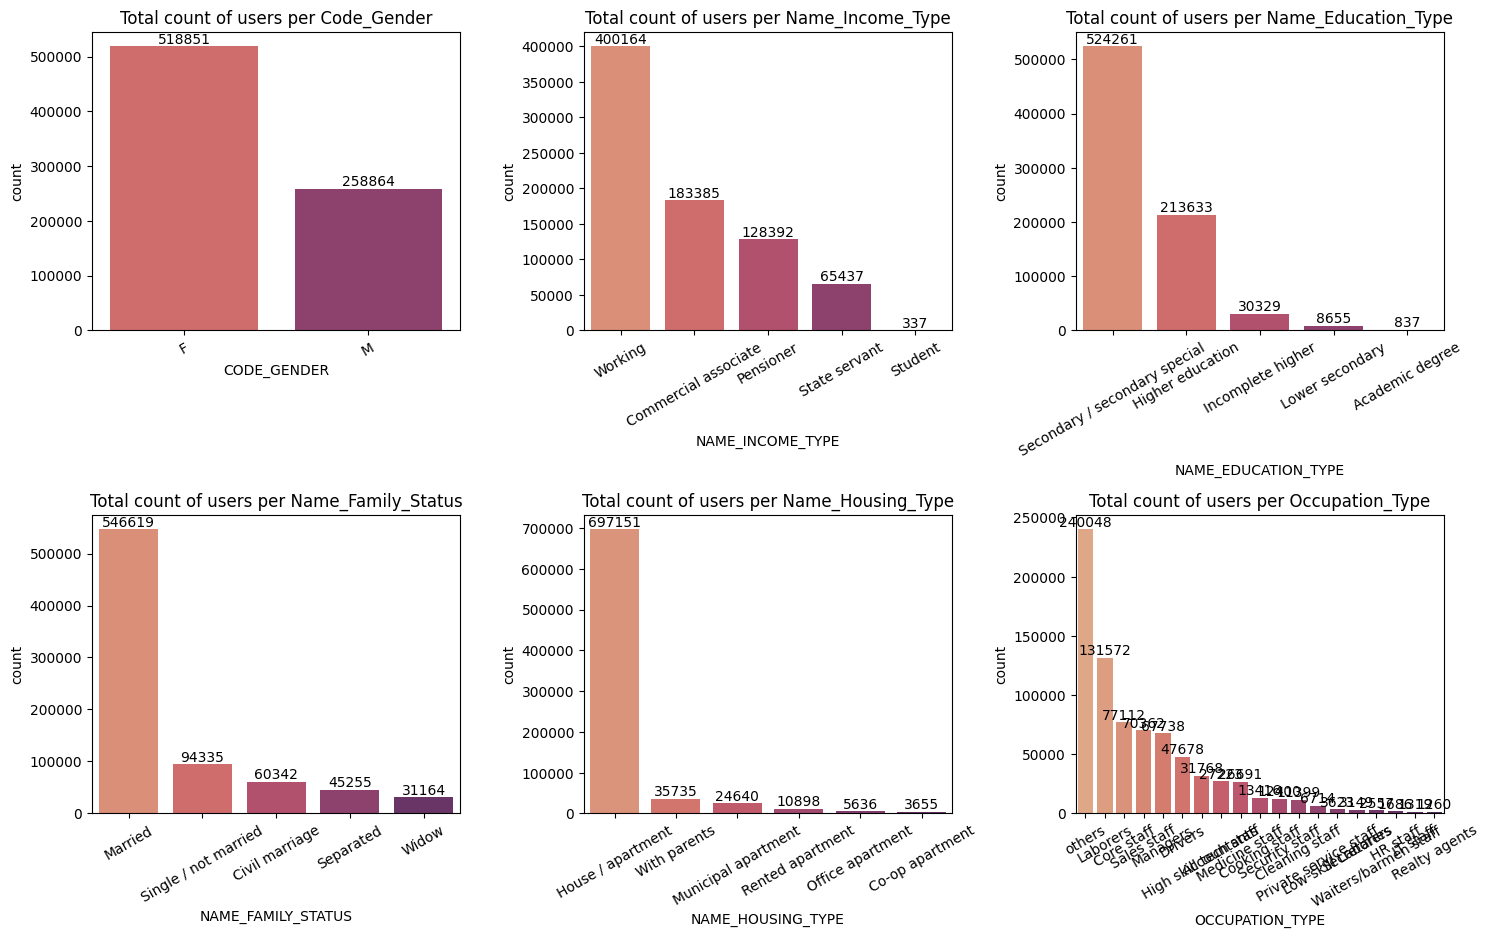

In [25]:
column_to_category = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
plt.figure(figsize=(15, 18))
category_bar_plot(df, column_to_category)

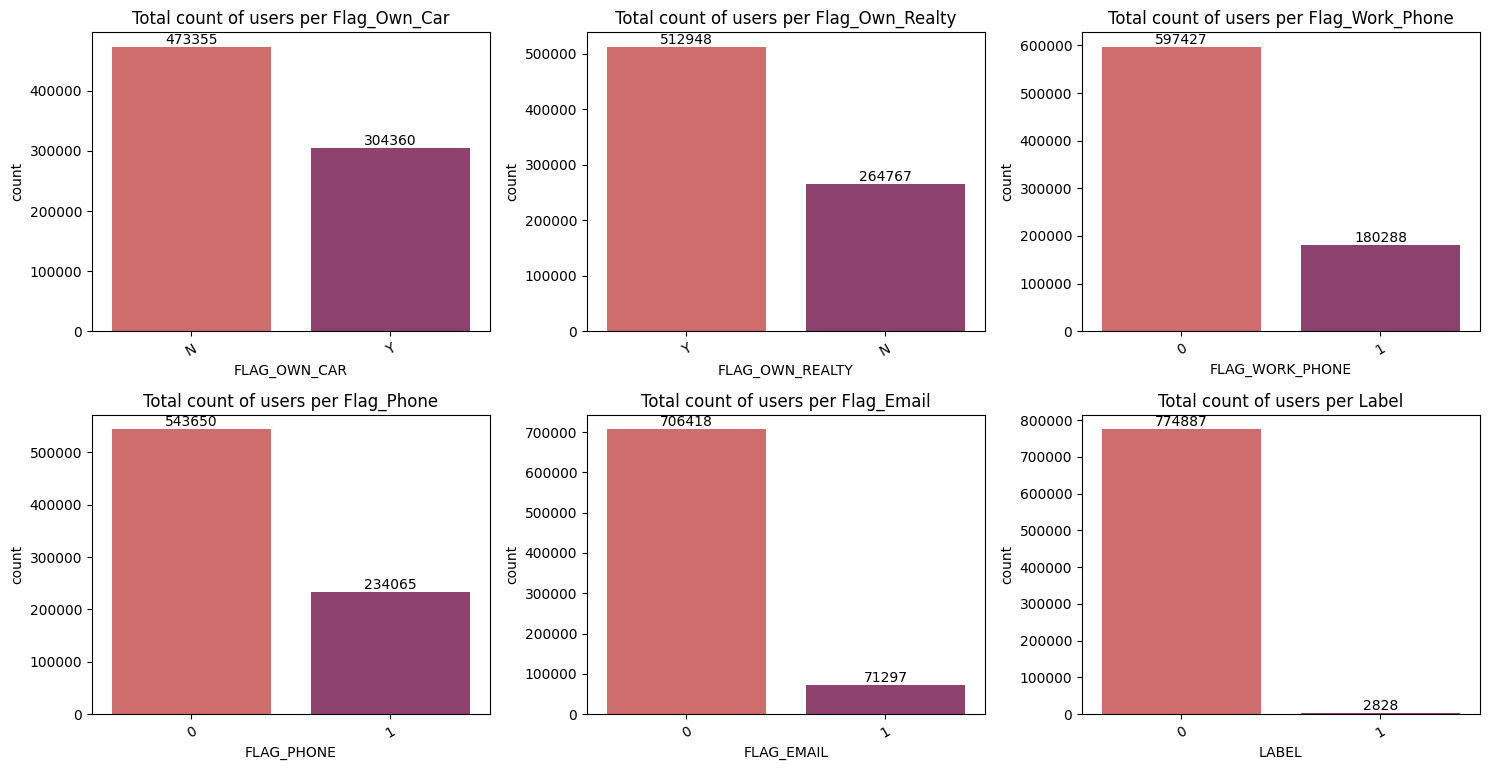

In [26]:
column_to_category = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'LABEL']
plt.figure(figsize=(15, 15))
category_bar_plot(df, column_to_category)

### 4.2 Numerical Data

In [27]:
df.select_dtypes(exclude='category').head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE,YEAR_EMPLOYED
0,0,427500.0,2.0,0,32,12
1,0,427500.0,2.0,-1,32,12
2,0,427500.0,2.0,-2,32,12
3,0,427500.0,2.0,-3,32,12
4,0,427500.0,2.0,-4,32,12


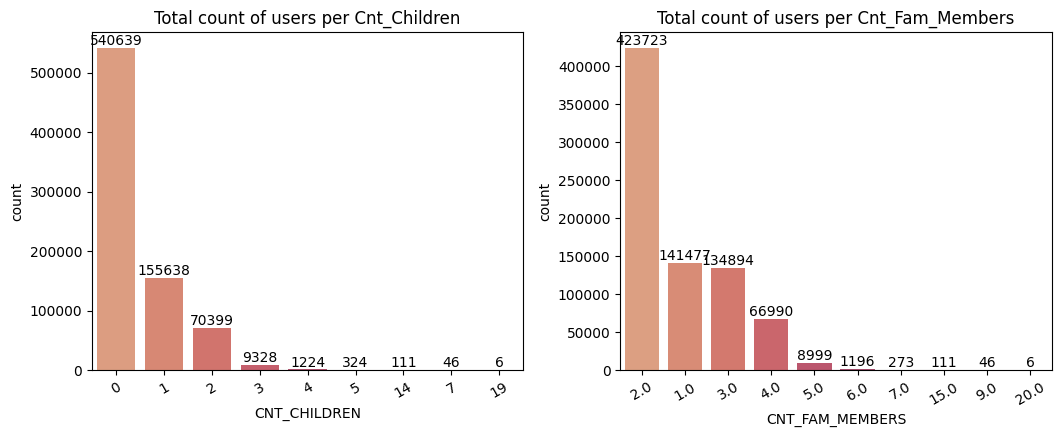

In [28]:
column_to_category = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
plt.figure(figsize=(16, 8))
category_bar_plot(df, column_to_category)

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

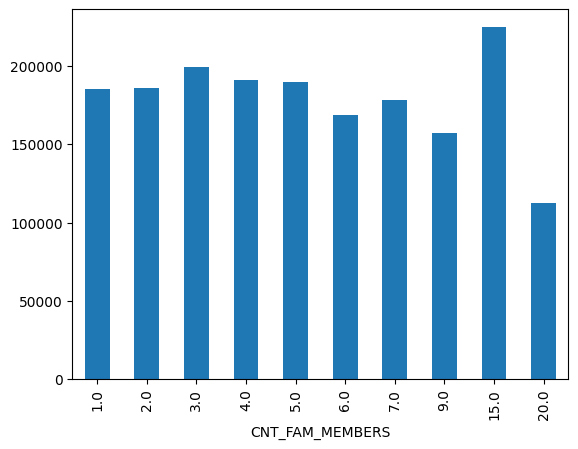

In [29]:
df.groupby('CNT_FAM_MEMBERS')['AMT_INCOME_TOTAL'].agg('mean').plot(kind='bar')

##  5 Data encoding

In [30]:
CATEGORICAL_COLUMNS = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']


In [31]:
for col in CATEGORICAL_COLUMNS:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col].values)

In [32]:
df = pd.get_dummies(df, drop_first=True, columns=['OCCUPATION_TYPE'])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_others
0,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1


## 6 Preparing X and Y variables

In [33]:
y = df['LABEL']
X = df.drop(columns=['LABEL'], axis=1)

In [34]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_others
0,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: LABEL, dtype: category
Categories (2, int64): [0, 1]

## 7 Dealing with Imbalanced data

In [36]:
df['LABEL'].value_counts()/len(df)*100

0    99.636371
1     0.363629
Name: LABEL, dtype: float64

In [37]:
under_sample = RandomUnderSampler(random_state=42, replacement=True)
X_rus, y_rus = under_sample.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_rus)))

The number of classes before fit Counter({0: 774887, 1: 2828})
The number of classes after fit Counter({0: 2828, 1: 2828})


### 7.1 Splitting data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

### 7.2 Scaling

In [39]:
# data standarization 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
X_train.shape, y_train.shape

((4524, 34), (4524,))

In [41]:
X_test.shape, y_test.shape

((1132, 34), (1132,))

## 8 Models

In [42]:
def pred_score(model, x_, y_, plot=True):
  # Prediction Train Data
  y_pred = model.predict(x_)
  #Model Performance on Train Dataset
  print("Accuracy", accuracy_score(y_pred, y_))
  print(classification_report(y_pred, y_, target_names=['not risky', 'risky']))
  if plot:
    plot_confusion_matrix(model, x_, y_)

def plot_confusion_matrix(model, X_test_, y_test_):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    # use model to do the prediction
    y_pred = model.predict(X_test_)
    # compute confusion matrix
    cm = confusion_matrix(y_test_, y_pred, labels=model.classes_)
    # plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not risky', 'risky'])
    disp.plot()
    plt.grid(False)
    plt.show()
    # sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
    #             xticklabels=sentiment_classes,
    #             yticklabels=sentiment_classes)
    # plt.title('Confusion matrix', fontsize=16)
    # plt.ylabel('Actual label', fontsize=12)
    # plt.xlabel('Predicted label', fontsize=12)

### 8.1 Logistic regression

In [43]:
time1 = time.time()

lr = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=123)
lr.fit(X_train, y_train)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 0.10 seconds


In [44]:
pred_score(lr, X_train, y_train, plot=False)

Accuracy 0.6065428824049514
              precision    recall  f1-score   support

   not risky       0.62      0.60      0.61      2327
       risky       0.59      0.61      0.60      2197

    accuracy                           0.61      4524
   macro avg       0.61      0.61      0.61      4524
weighted avg       0.61      0.61      0.61      4524



Accuracy 0.5918727915194346
              precision    recall  f1-score   support

   not risky       0.58      0.61      0.59       555
       risky       0.60      0.58      0.59       577

    accuracy                           0.59      1132
   macro avg       0.59      0.59      0.59      1132
weighted avg       0.59      0.59      0.59      1132



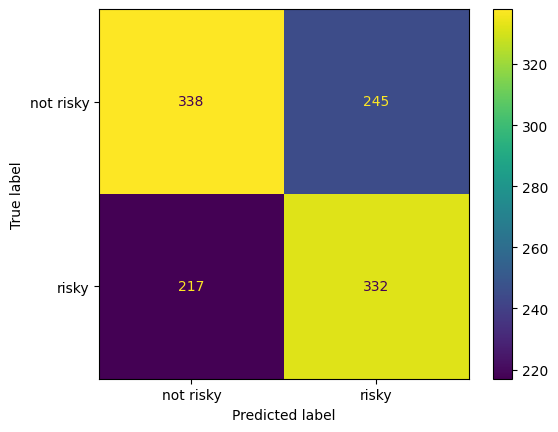

In [45]:
pred_score(lr, X_test, y_test)

### 8.2 Random Forest

In [46]:
time1 = time.time()

rf = RandomForestClassifier(n_estimators=10, max_depth=20, bootstrap=True, min_samples_leaf=2, min_samples_split=4, random_state=50, n_jobs=-1)
rf.fit(X_train, y_train)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 0.08 seconds


In [47]:
pred_score(rf, X_train, y_train, plot=False)

Accuracy 0.9595490716180372
              precision    recall  f1-score   support

   not risky       0.97      0.95      0.96      2310
       risky       0.95      0.97      0.96      2214

    accuracy                           0.96      4524
   macro avg       0.96      0.96      0.96      4524
weighted avg       0.96      0.96      0.96      4524



Accuracy 0.9063604240282686
              precision    recall  f1-score   support

   not risky       0.91      0.91      0.91       587
       risky       0.90      0.91      0.90       545

    accuracy                           0.91      1132
   macro avg       0.91      0.91      0.91      1132
weighted avg       0.91      0.91      0.91      1132



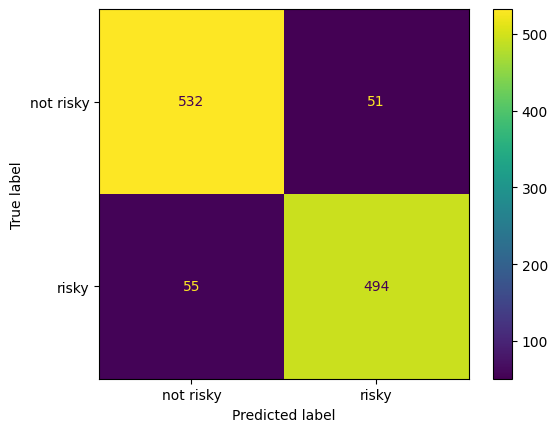

In [48]:
pred_score(rf, X_test, y_test)

### 8.3 XGBoost Classifier


In [49]:
time1 = time.time()

xg = XGBClassifier(max_depth=6, n_estimators=200, reg_lambda=0.15, subsample=0.7, learning_rate=0.099, n_jobs=-1)
xg.fit(X_train, y_train)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 2.39 seconds


In [50]:
pred_score(xg, X_train, y_train, plot=False)

Accuracy 0.9732537577365163
              precision    recall  f1-score   support

   not risky       0.98      0.97      0.97      2266
       risky       0.97      0.98      0.97      2258

    accuracy                           0.97      4524
   macro avg       0.97      0.97      0.97      4524
weighted avg       0.97      0.97      0.97      4524



Accuracy 0.9090106007067138
              precision    recall  f1-score   support

   not risky       0.90      0.92      0.91       566
       risky       0.92      0.89      0.91       566

    accuracy                           0.91      1132
   macro avg       0.91      0.91      0.91      1132
weighted avg       0.91      0.91      0.91      1132



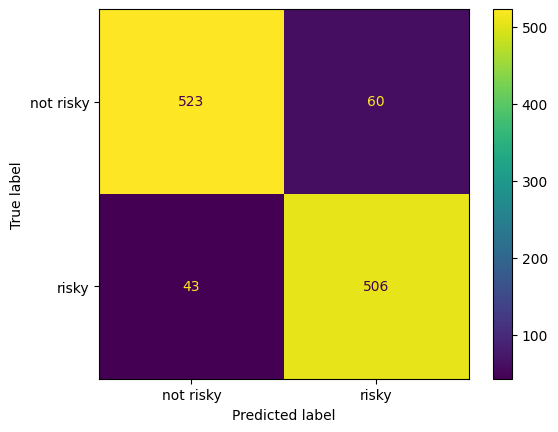

In [51]:
pred_score(xg, X_test, y_test)